***About the Project:***

---
> **"Employee Attrition"** is an acute problem for an organization. In general, Employees do suffer from layoffs. Sometimes organizations do fire their employees due to different reasons, on the contrary employees also leave the organization because of different factors. Here in this project I will be working on IBM Employee Attrition dataset where the ultimate goal is to find the underlying pattern in the dataset, figuring out the factor affecting the employee attrition as well as to develop an ML model which could further be used in future days to predict whether one employee will continue with the company or not in an early basis so that company can take some preliminary measures to retain their potential  employees. 

To know more about the challenge please have a look at the below mentioned link:
[Click to know more about the project](https://www.kaggle.com/competitions/playground-series-s3e3)








***PLan of Attack:***

---
Let's understand the workflow of this project before moving further:
1. Importing the Dataset 
2. Understanding the Dataset 
3. Performing EDA on the Dataset to understand underlying pattern 
4. Data Preprocessing 
5. Balancing the Dataset
5. Model Building


#Importing the Necessary Libraries

In [1]:
import numpy as np #to perform different arithmetic operation 
import pandas as pd #to handle dataframe 
import matplotlib.pyplot as plt #to perform different visualization 
%matplotlib inline
import warnings
'''to clear the warning message'''
from sklearn.exceptions import ConvergenceWarning
# Filter the warning message
warnings.filterwarnings("ignore", category=FutureWarning)
# Disable convergence warning messages
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Disable Deprecatio warning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#Importing the dataset

In [2]:
data=pd.read_csv("/kaggle/input/employee-attrition/train.csv")

#About the Dataset

Initially, it’s necessary to understand the dataset. To work with the dataset, it's crucial to know what features are present and the detail of different features. In this dataset, there are 35 features present. So, let’s have a look at what this feature tells us.
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

th {
  background-color: #4CAF50;
  color: white;
}
</style>

<table>
  <tr>
    <th>Serial Number</th>
    <th>Name of the Attribute</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Age</td>
    <td>Employee's age</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Gender</td>
    <td>Employee's gender</td>
  </tr>
  <tr>
    <td>3</td>
    <td>BusinessTravel</td>
    <td>Frequency of employees' business trips</td>
  </tr>
  <tr>
    <td>4</td>
    <td>DailyRate</td>
    <td>Daily salary rate for employees</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Department</td>
    <td>Office of employees</td>
  </tr>
  <tr>
    <td>6</td>
    <td>DistanceFromHome</td>
    <td>Distance from home in miles to work</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Education</td>
    <td>Level of education achieved by staff</td>
  </tr>
  <tr>
    <td>8</td>
    <td>EducationField</td>
    <td>Employee's field of study</td>
  </tr>
  <tr>
    <td>9</td>
    <td>EmployeeCount</td>
    <td>Total number of employees in the organization</td>
  </tr>
  <tr>
    <td>10</td>
    <td>EmployeeNumber</td>
    <td>A unique identifier for each employee record</td>
  </tr>
  <tr>
    <td>11</td>
    <td>EnvironmentSatisfaction</td>
    <td>Employee satisfaction with their working environment</td>
  </tr>
  <tr>
    <td>12</td>
    <td>HourlyRate</td>
    <td>Hourly rate for employees</td>
  </tr>
  <tr>
    <td>13</td>
    <td>JobInvolvement</td>
    <td>Level of involvement required for the employee's job</td>
  </tr>
  <tr>
    <td>14</td>
    <td>JobLevel</td>
    <td>Employee's level of work</td>
  </tr>
  <tr>
    <td>15</td>
    <td>JobRole</td>
    <td>The role of employees in the organization</td>
  </tr>
  <tr>
    <td>16</td>
    <td>JobSatisfaction</td>
    <td>Employee satisfaction with their work</td>
  </tr>
  <tr>
    <td>17</td>
    <td>MaritalStatus</td>
    <td>Employee's marital status</td>
  </tr>
  <tr>
    <td>18</td>
    <td>MonthlyIncome</td>
    <td>Employee's monthly income</td>
  </tr>
  <tr>
    <td>19</td>
    <td>MonthlyRate</td>
    <td>Monthly salary rate for employees</td>
  </tr>
  <tr>
    <td>20</td>
    <td>NumCompaniesWorked</td>
    <td>Number of companies the employee worked for</td>
  </tr>
  <tr>
    <td>21</td>
    <td>Over18</td>
    <td>Whether the employee is over 18 years old</td>
  </tr>
  <tr>
    <td>22</td>
    <td>OverTime</td>
    <td>Do employees work overtime</td>
  </tr>
  <tr>
    <td>23</td>
    <td>PercentSalaryHike</td>
    <td>Salary increase rate for employees</td>
  </tr>
  <tr>
    <td>24</td>
    <td>PerformanceRating</td>
    <td>The performance rating of the employee</td>
  </tr>
  <tr>
    <td>25</td>
    <td>RelationshipSatisfaction</td>
    <td>Employee satisfaction with their relationships</td>
  </tr>
  <tr>
    <td>26</td>
    <td>StandardHours</td>
    <td>Standard working hours for employees</td>
  </tr>
  <tr>
    <td>27</td>
    <td>StockOptionLevel</td>
    <td>Employee stock option level</td>
  </tr>
  <tr>
    <td>28</td>
    <td>TotalWorkingYears</td>
    <td>Total number of years the employee has worked</td>
  </tr>
  <tr>
    <td>29</td>
    <td>TrainingTimesLastYear</td>
    <td>Number of times employees were taken to training in the last year</td>
  </tr>
  <tr>
    <td>30</td>
    <td>WorkLifeBalance</td>
    <td>Employees' perception of their work-life balance</td>
  </tr>
  <tr>
    <td>31</td>
    <td>YearsAtCompany</td>
    <td>Number of years employees have been with the company</td>
  </tr>
  <tr>
    <td>32</td>
    <td>YearsInCurrentRole</td>
    <td>Number of years the employee has been in their current role</td>
  </tr>
  <tr>
    <td>33</td>
    <td>YearsSinceLastPromotion</td>
    <td>Number of years since employee's last promotion</td>
  </tr>
  <tr>
    <td>34</td>
    <td>YearsWithCurrManager</td>
    <td>Number of years an employee has been with their current manager</td>
  </tr>
  <tr>
    <td>35</td>
    <td>Attrition</td>
    <td>Does the employee leave the organization</td>
  </tr>
</table>



#Data Preprocessing

In [3]:
data.shape
'''so using the data.shape we can see that there are 1677 entries and 35 different feature present in the dataset'''

'so using the data.shape we can see that there are 1677 entries and 35 different feature present in the dataset'

In [4]:
data.head() #we can also have a look at top 5 entries of the dataset

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


**Checking the missing Values:**


> Next big step is to check the presence of the missing values. It's really necessary to remember that there are different types of missing values. 
1. Nan values 
2. Empty sell 
3. Zero entries 
4. Unrealistic Negative Entries like negative values in age feature. 

...... and many other







In [5]:
missing_values= data.isnull().sum()
print(missing_values)

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

We can also check is there any unwanted negative values present in the dataset. 

In [6]:
# select the numeric columns
numeric_cols = data.select_dtypes(include='number')

# count the number of negative values in each column
negative_counts = {}
for col in numeric_cols:
        negative_counts[col] = (data[col].lt(0).sum())

print("Negative value counts by column:")
for key, values in negative_counts.items():
  print(key,":", values)

Negative value counts by column:
id : 0
Age : 0
DailyRate : 0
DistanceFromHome : 0
Education : 0
EmployeeCount : 0
EnvironmentSatisfaction : 0
HourlyRate : 0
JobInvolvement : 0
JobLevel : 0
JobSatisfaction : 0
MonthlyIncome : 0
MonthlyRate : 0
NumCompaniesWorked : 0
PercentSalaryHike : 0
PerformanceRating : 0
RelationshipSatisfaction : 0
StandardHours : 0
StockOptionLevel : 0
TotalWorkingYears : 0
TrainingTimesLastYear : 0
WorkLifeBalance : 0
YearsAtCompany : 0
YearsInCurrentRole : 0
YearsSinceLastPromotion : 0
YearsWithCurrManager : 0
Attrition : 0


So there is no unwanted negative values present in the dataset. So its a relief because we need not to handle missing values. Great :) !! Lets move forward. 

In [7]:
#We can also check the overview of the dataset 
data.describe()


,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


'''from this we can understand a lot of things'''
1. The youngest employee is 18 years old whereas the oldest one is 60 years old. 
2. Most of the employees age range from 30 to 41 years.

and lots of other things too just having a glance..........

**Distribution of different feature:**


> We can just have a basic understanding after seeing the below histograms of different numerical features. We can understand distribution of different features with resepct to their correspondin entries. 
Further we can have a deeper look on each of this individual features along with the categorical features.




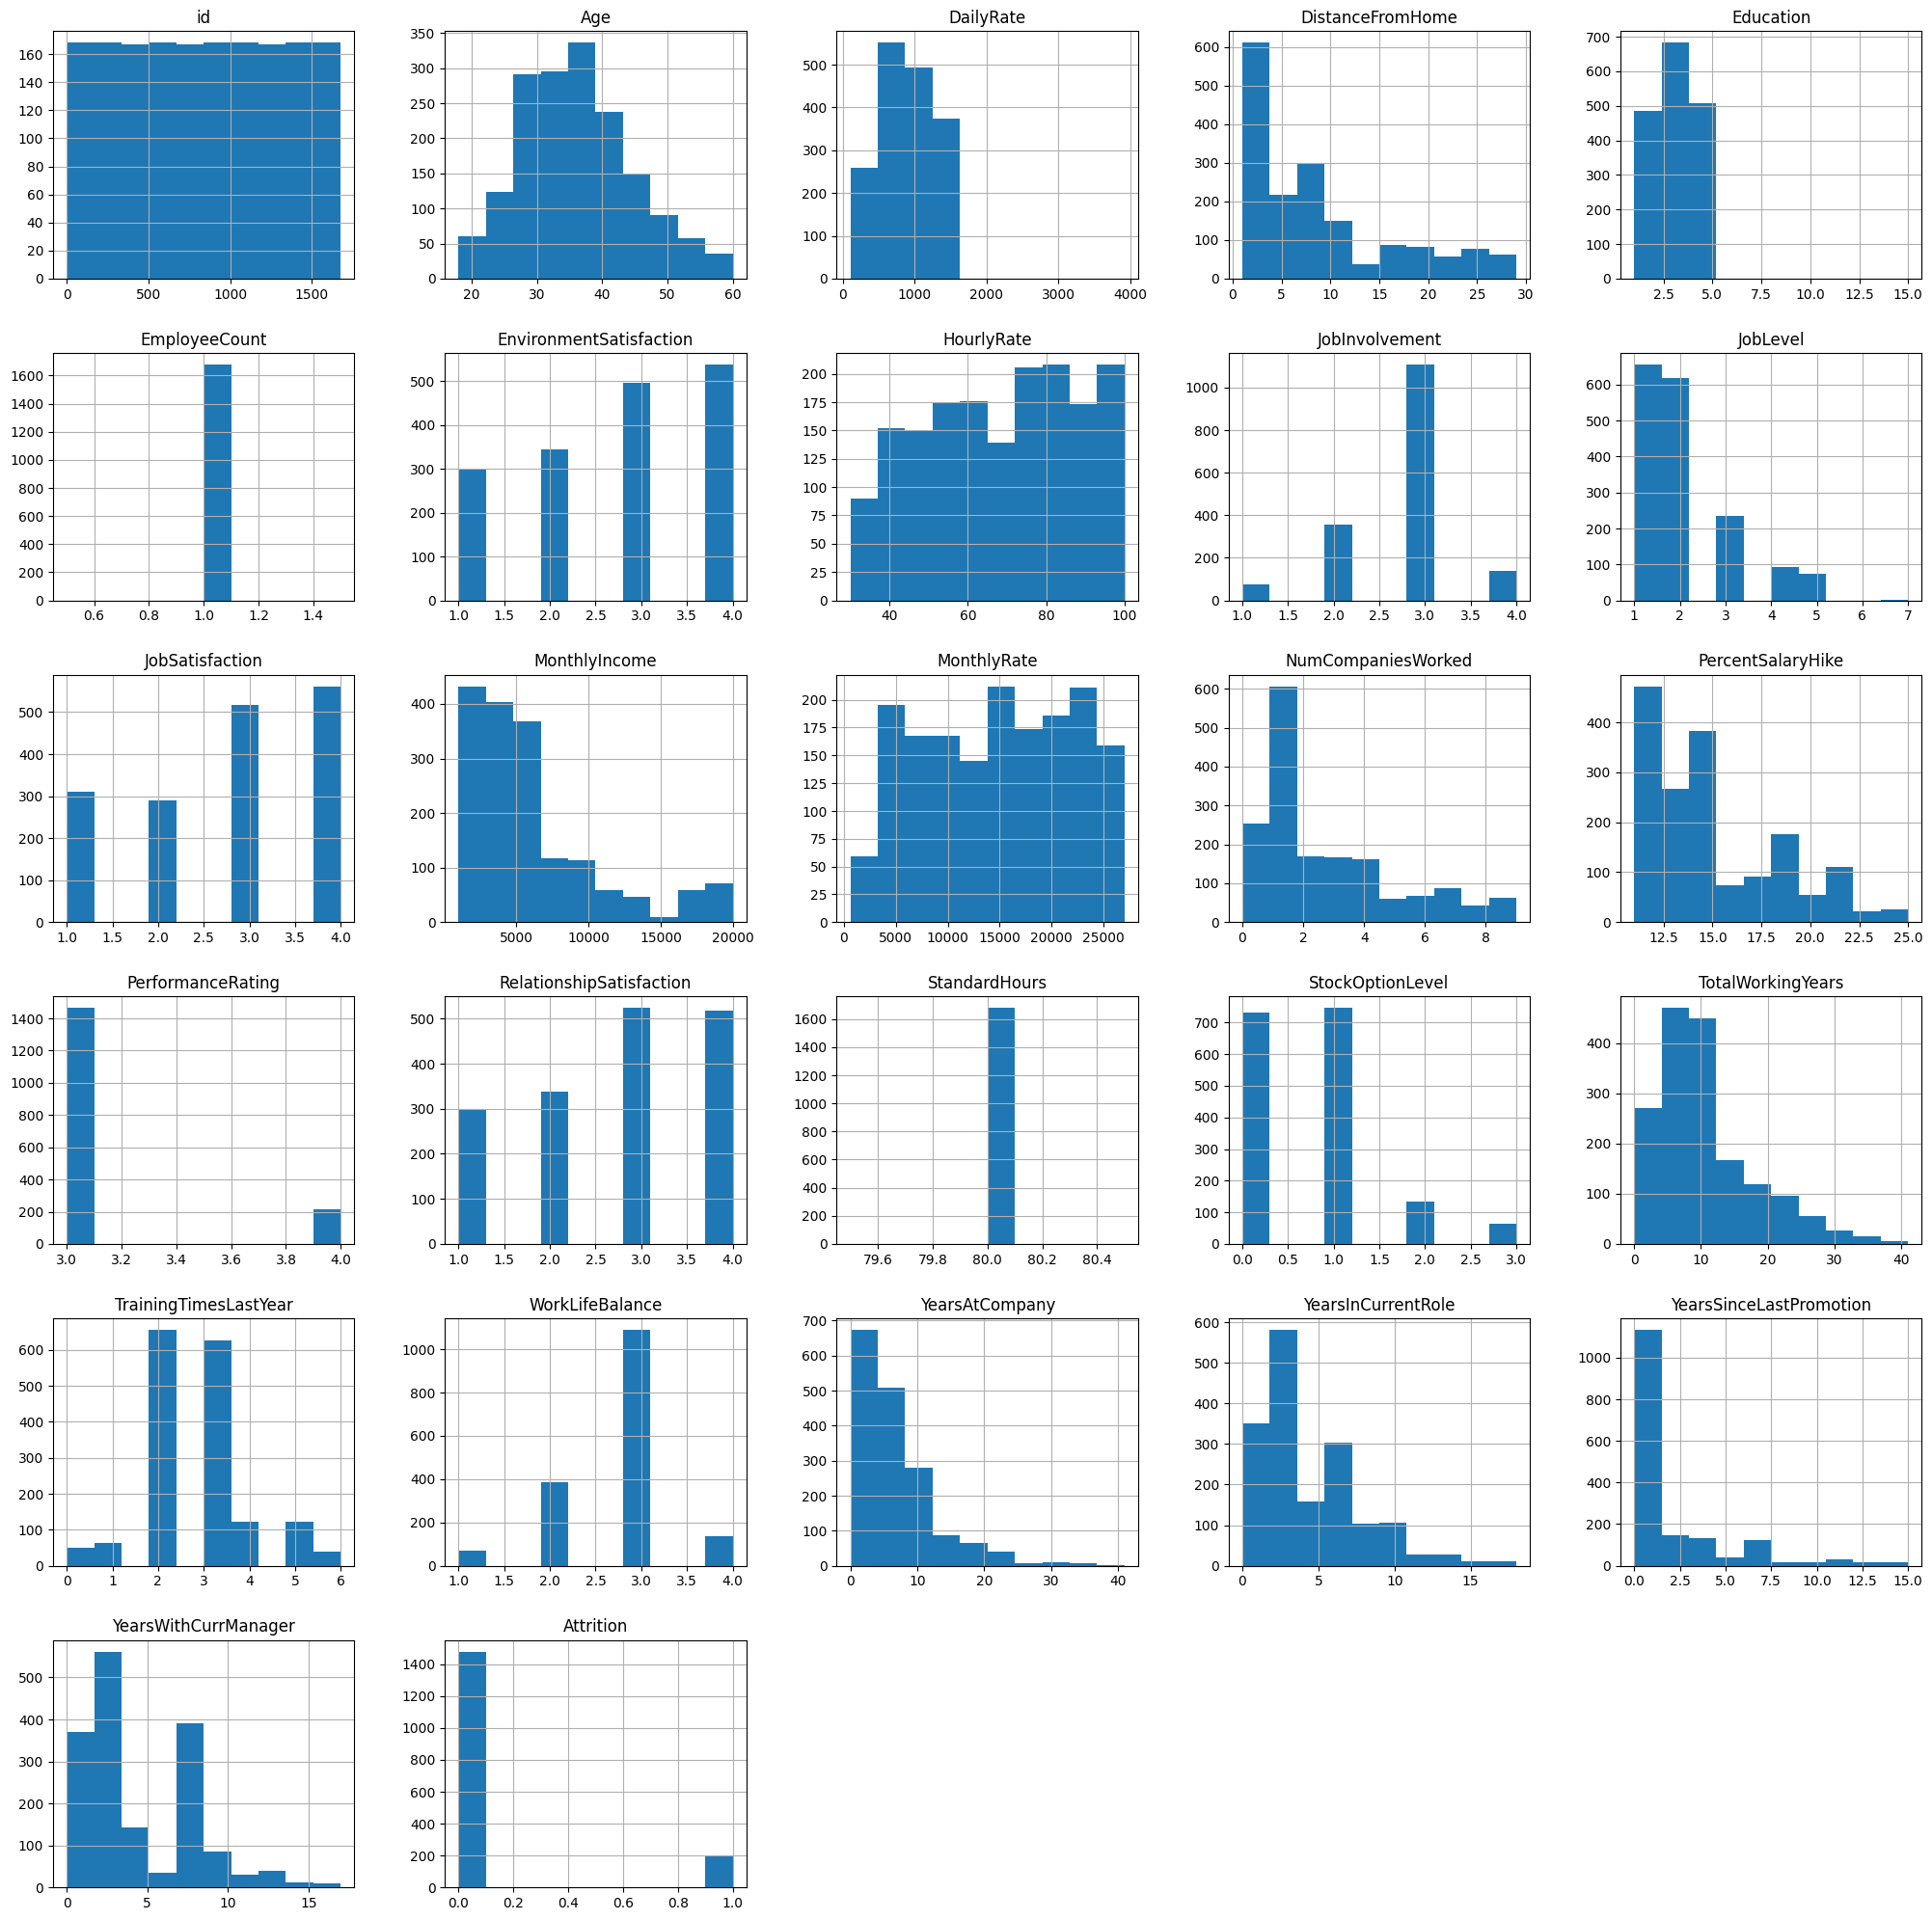

In [8]:
data.hist(figsize=(25,25))
plt.show()

**Let's check the unique values present in different features:**

> Now we will check what are the unique values present in a particular feature.



In [9]:
#seperate the numerical and categorical columns 
# select the numeric columns
numeric_column = data.select_dtypes(include='number')
# select the categorical columns
categorical_column = data.select_dtypes(include='object')

In [10]:
#lets check the unique values 
for column in categorical_column:
    print('Unique values present in {} Column: '.format(column), data[column].unique(),"\n")

Unique values present in BusinessTravel Column:  ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel'] 

Unique values present in Department Column:  ['Research & Development' 'Sales' 'Human Resources'] 

Unique values present in EducationField Column:  ['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources'] 

Unique values present in Gender Column:  ['Male' 'Female'] 

Unique values present in JobRole Column:  ['Laboratory Technician' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Manager' 'Manufacturing Director'
 'Research Scientist' 'Human Resources' 'Research Director'] 

Unique values present in MaritalStatus Column:  ['Married' 'Divorced' 'Single'] 

Unique values present in Over18 Column:  ['Y'] 

Unique values present in OverTime Column:  ['Yes' 'No'] 



#EDA
Now it’s time to perform some Exploratory Data Analysis. Here in this dataset, there is a lot which can be done. In this case it’s better to use different BI tools such as Power BI and Tableau to have some insightful visualization in short amount of time.


**`Here 1 means attrition and 0 means not an attrition`**

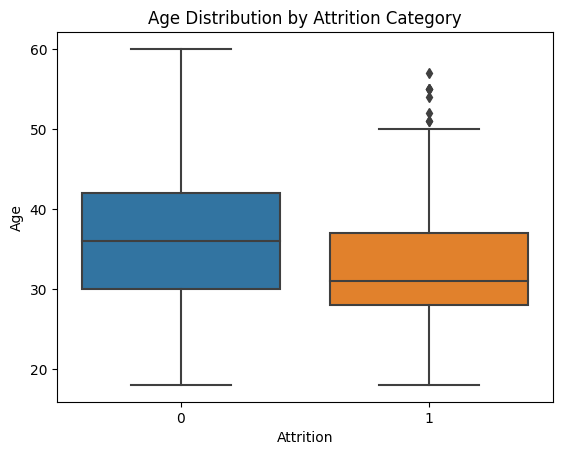

In [11]:
#Age distribution with respect to Attrition Feature 
# create a boxplot of age distribution by attrition category
import seaborn as sns
sns.boxplot(x='Attrition', y='Age', data=data)

# add labels and title
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.title('Age Distribution by Attrition Category')

# display the plot
plt.show()

**`Insight-1:`**
Most the Employees who do leave the company below to the lower age group. So it means that young employees are more vulnerable to attrition compare to the old employees. 

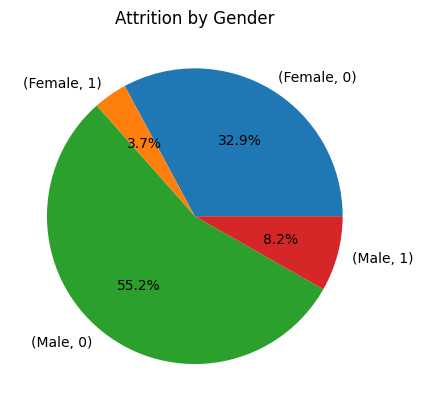

In [12]:
#Gender distribution with respect to Attrition Feature 
# count the number of occurrences of each combination of gender and attrition
counts = data.groupby(['Gender', 'Attrition']).size()

# create a pie plot of the counts
counts.plot.pie(autopct='%1.1f%%')

# add title
plt.title('Attrition by Gender')

# display the plot
plt.show()

**`Insight-2`**
<ul>
<li>2.1: The percentage of Male employees are more than the womens.</li>
<li>2.2: Even though its shows the percentage of male empolyees who left the job is more but here the male employees are also more. So, mathematically as Female employees are less is number so they are more vulnerable to attrition.</li>
</ul>






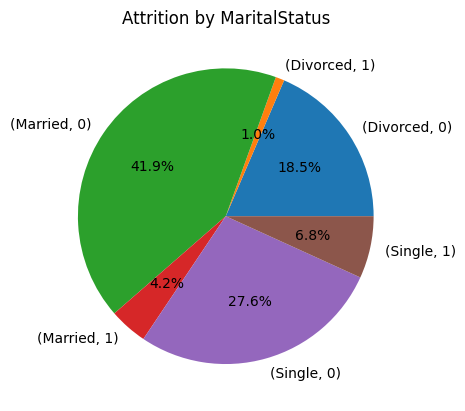

In [13]:
#Maritual distribution with respect to Attrition Feature 
# count the number of occurrences of each combination of MaritalStatus and attrition
counts = data.groupby(['MaritalStatus', 'Attrition']).size()

# create a pie plot of the counts
counts.plot.pie(autopct='%1.1f%%')

# add title
plt.title('Attrition by MaritalStatus')

# display the plot
plt.show()

**`Insight-3`**
<ul>
<li>3.1: The percentage of Male Married Employees are more than single and divorced.</li>
<li>3.2: It's more obvious and clear that single employees are more vulnerable to attrition and divorced people are less.</li>
</ul>

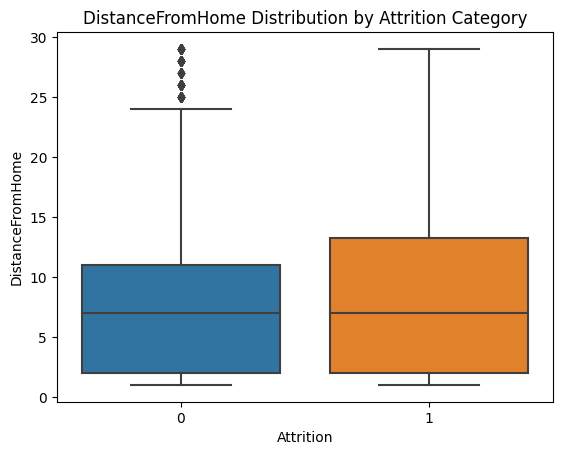

In [14]:
#DistanceFromHome distribution with respect to Attrition Feature 
# create a boxplot of DistanceFromHome distribution by attrition category
import seaborn as sns
sns.boxplot(x='Attrition', y='DistanceFromHome', data=data)

# add labels and title
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.title('DistanceFromHome Distribution by Attrition Category')

# display the plot
plt.show()

**`Insight-4`**
<ul>
<li>4.1: The Employees whose house is far away from the office are more vulnerable to attrition.</li>
</ul>

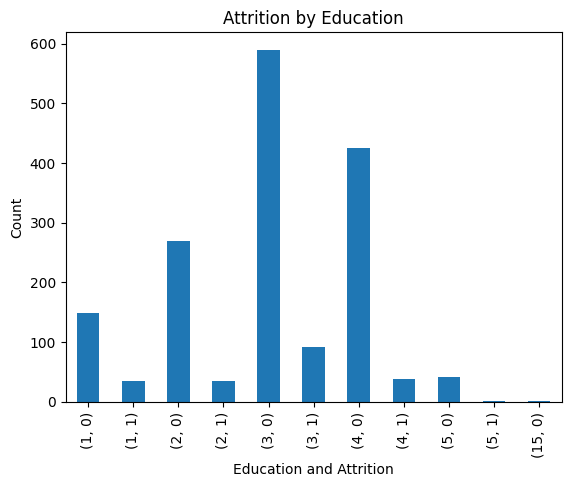

In [15]:
# count the number of occurrences of each combination of education and attrition
counts = data.groupby(['Education', 'Attrition']).size()

# create a bar plot of the counts
counts.plot.bar()

# add labels and title
plt.xlabel('Education and Attrition')
plt.ylabel('Count')
plt.title('Attrition by Education')

# display the plot
plt.show()

**`Insight-5`**
<ul>
<li>5.1: Most of Employees are having a education level of 3 and 4 and they are also more vulnerable to attrition compare to the employees who are having higher and lower level of education.</li>

</ul>

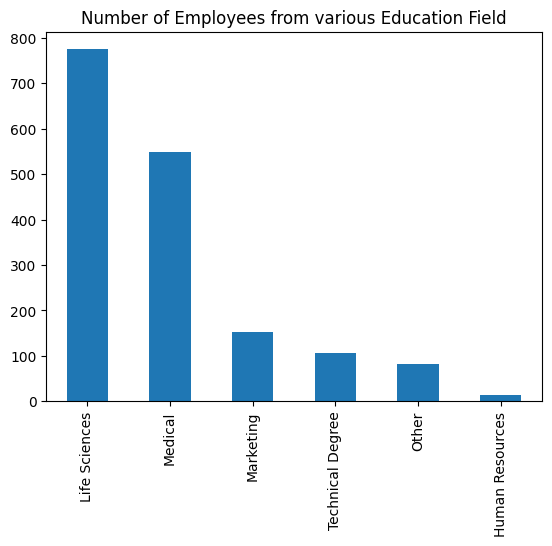

In [16]:
#distribution of Employees with respect to EducationField
counts = data["EducationField"].value_counts()

# create a pie plot of the counts
counts.plot.bar()

# add title
plt.title('Number of Employees from various Education Field')

# display the plot
plt.show()

**`Insight-6`**
<ul>
<li>6.1: Most of Employees are form Life Science and Medical Background. So there is a high change that its a pharmaceutical company.</li>

</ul>

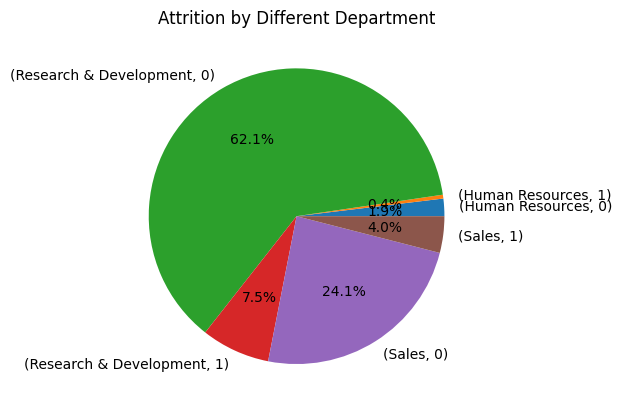

In [17]:
#distribution of Employees from Different Department with respect to Attrition Feature 
# count the number of occurrences of each combination of Department and attrition
counts = data.groupby(['Department', 'Attrition']).size()

# create a pie plot of the counts
counts.plot.pie(autopct='%1.1f%%')

# add title
plt.title('Attrition by Different Department')

# display the plot
plt.show()

**`Insight-7`**
<ul>
<li>7.1: Most of Employees are form R&D Department and their turnover rate is also higher.</li>
<li>7.2: HR department is having lower number of Employees having a lower turnover rate.</li>

</ul>

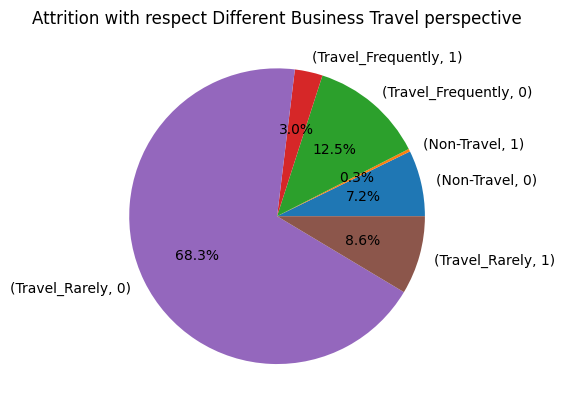

In [18]:
#Distribution of Employees who need to travel with respect to Attrition Feature 
# count the number of occurrences of each combination of BusinessTravel and attrition
counts = data.groupby(['BusinessTravel', 'Attrition']).size()

# create a pie plot of the counts
counts.plot.pie(autopct='%1.1f%%')

# add title
plt.title('Attrition with respect Different Business Travel perspective')

# display the plot
plt.show()

**`Insight-8`**
<ul>
<li>8.1: Most of Employees Have to travel a lot.</li>
<li>8.2: Employees who do travel rarely have higher attrition rate.</li>
<li>8.3: Employees who do not need to travel are more engaged to the company.</li>

</ul>

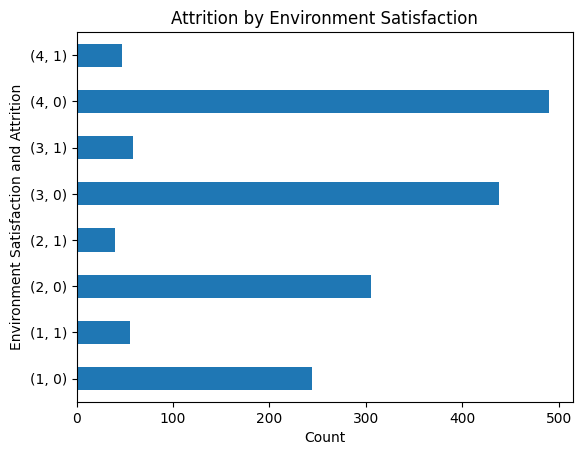

In [19]:
# count the number of occurrences of each combination of EnvironmentSatisfaction and attrition
counts = data.groupby(['EnvironmentSatisfaction', 'Attrition']).size()

# create a horizontal bar chart of the counts
counts.plot.barh()

# add labels and title
plt.xlabel('Count')
plt.ylabel('Environment Satisfaction and Attrition')
plt.title('Attrition by Environment Satisfaction')

# display the plot
plt.show()

**`Insight-9`**
<ul>
<li>9.1: Most of Employees are satisfied with the Working Environment of the company.</li>
<li>9.2: Working Environment does not have much impact on  attrition.</li>

</ul>

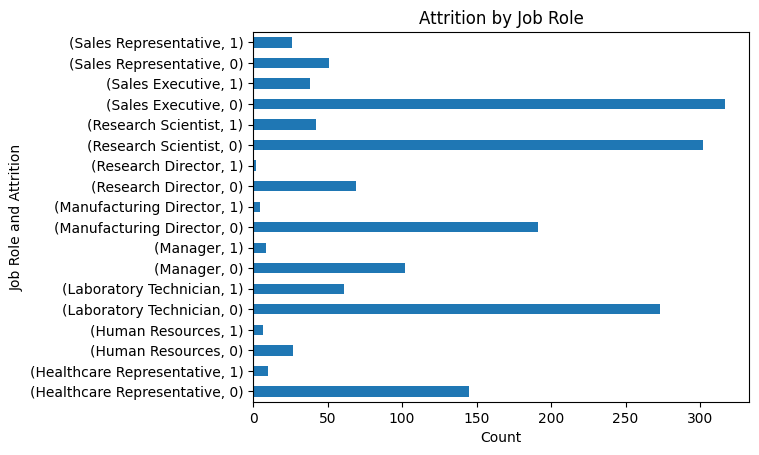

In [20]:
# Count the number of occurrences of each combination of Job Role and attrition
counts = data.groupby(['JobRole', 'Attrition']).size()

# create a horizontal bar chart of the counts
counts.plot.barh()

# add labels and title
plt.xlabel('Count')
plt.ylabel('Job Role and Attrition')
plt.title('Attrition by Job Role')

# display the plot
plt.show()

**`Insight-10`**
<ul>
<li>10.1: Most of Employees are in the position of Research Scientist and Sales Executive and these employees are having higher turnover rate along with them Labratory Technicians are also having higer turn over rate.</li>
<li>10.2: One important thing is to notice that if one particular postition is having larger number of employees then that particular department is having higher turnover rate.</li>

</ul>

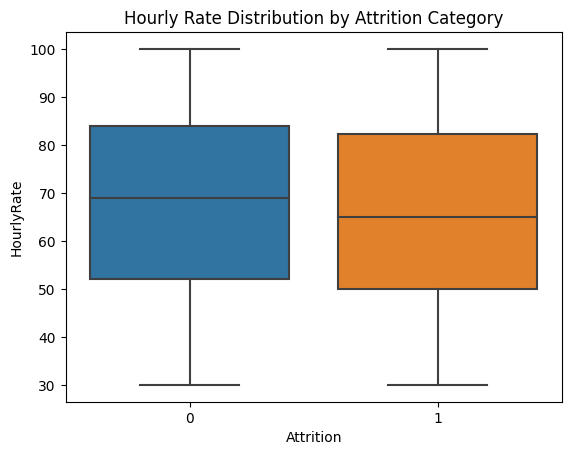

In [21]:
#Hourly Rate distribution with respect to Attrition Feature 
# create a boxplot of Hourly Rate distribution by attrition category
import seaborn as sns
sns.boxplot(x='Attrition', y='HourlyRate', data=data)

# add labels and title
plt.xlabel('Attrition')
plt.ylabel('HourlyRate')
plt.title('Hourly Rate Distribution by Attrition Category')

# display the plot
plt.show()

**`Insight-11`**
<ul>
<li>11.1: The Average hourly rate of the Employees is around 68.</li>
<li>11.2: Hourly Rate does not have major impact on the turnover rate of the employees.</li>

</ul>

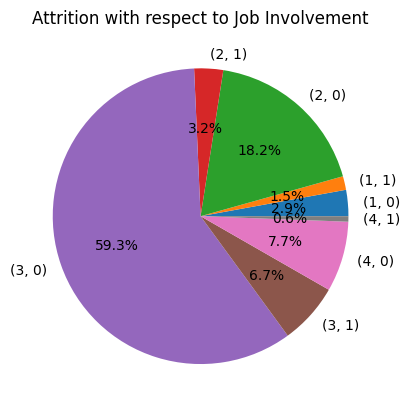

In [22]:
#Distribution of Job Involvement with respect to Attrition Feature 
# count the number of occurrences of each combination of JobInvolvement and attrition
counts = data.groupby(['JobInvolvement', 'Attrition']).size()

# create a pie plot of the counts
counts.plot.pie(autopct='%1.1f%%')

# add title
plt.title('Attrition with respect to Job Involvement')

# display the plot
plt.show()

**`Insight-12`**
<ul>
<li>12.1: Employees who are strongly Involved (4) and litely involved(1) are less vulnerable to turnover</li>
<li>12.2: Employees who are moderately Involved (3,2) are more vulnerable to turnover</li>

</ul>

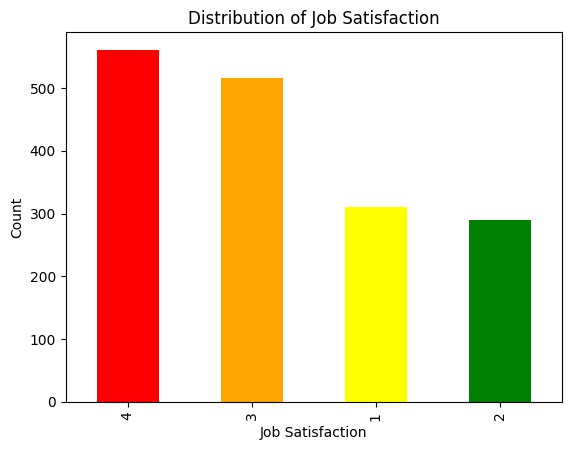

In [23]:
# count the number of occurrences of each job satisfaction level
counts = data['JobSatisfaction'].value_counts()

# create a list of colors for each bar
colors = ['red', 'orange', 'yellow', 'green']

# create a bar chart of the counts
counts.plot.bar(color=colors)

# add labels and title
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction')

# display the plot
plt.show()

**`Insight-12`**
<ul>
<li>12.1: Most of the Empolyees are satisfied with the job</li>

</ul>

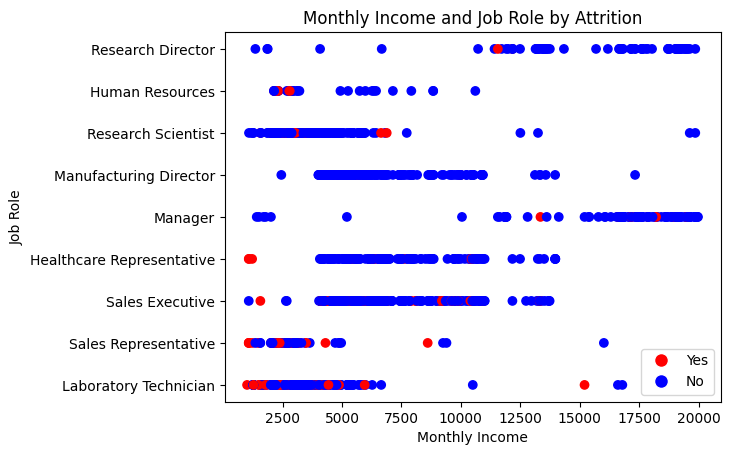

In [24]:
# create a scatter plot of the monthly income and job role, colored by attrition
colors = {1 : 'red', 0 : 'blue'}
plt.scatter(data['MonthlyIncome'], data['JobRole'], c=data['Attrition'].map(colors))

# add labels and title
plt.xlabel('Monthly Income')
plt.ylabel('Job Role')
plt.title('Monthly Income and Job Role by Attrition')
# add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Yes', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='No', markerfacecolor='blue', markersize=10)]
plt.legend(handles=legend_elements)
# display the plot
plt.show()

**`Insight-13`**
<ul>
<li>13.1: Employees from lower salary group are having higher rate of turnover</li>

</ul>

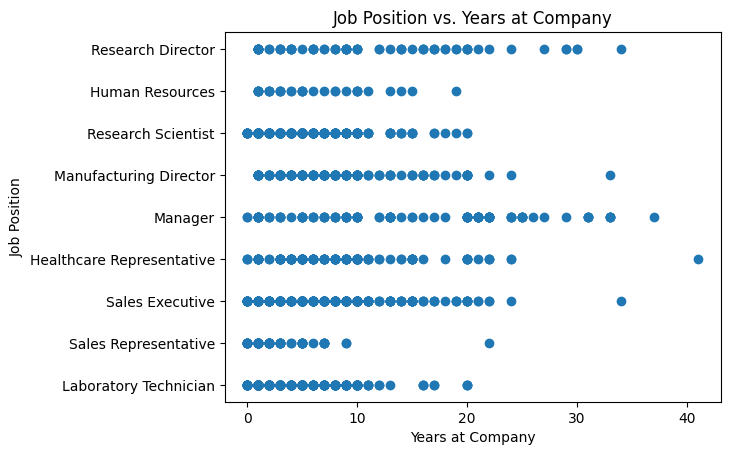

In [25]:
# create a scatter plot of job position and years at company
plt.scatter(data['YearsAtCompany'], data['JobRole'])

# add labels and title
plt.xlabel('Years at Company')
plt.ylabel('Job Position')
plt.title('Job Position vs. Years at Company')

# display the plot
plt.show()

**`Insight-14`**
<ul>
<li>14.1: Its clear that Employees at higher position get more salary, they are continuing with the company for longer duration and their attrition rate is lower and the scenario is oppositive the employees at lower position.</li>

</ul>

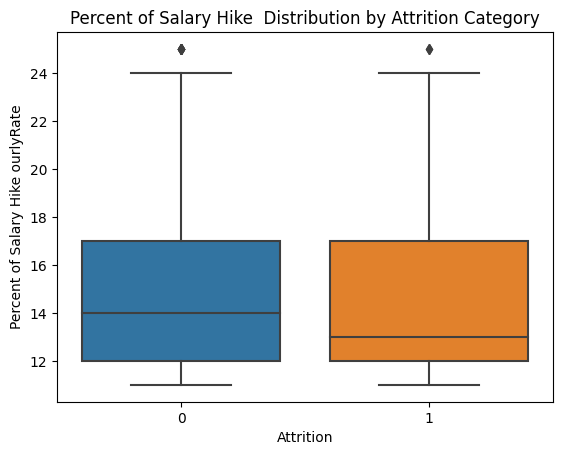

In [26]:
#Percent of Salary Hike distribution with respect to Attrition Feature 
# create a boxplot of Hourly Rate distribution by attrition category
import seaborn as sns
sns.boxplot(x='Attrition', y='PercentSalaryHike', data=data)

# add labels and title
plt.xlabel('Attrition')
plt.ylabel('Percent of Salary Hike ourlyRate')
plt.title('Percent of Salary Hike  Distribution by Attrition Category')

# display the plot
plt.show()

**`Insight-15`**
<ul>
<li>15.1: The Median of the salary hike is higher for the employees who are with the company. So the employees who leave the company do have lower salary hike.</li>

</ul>

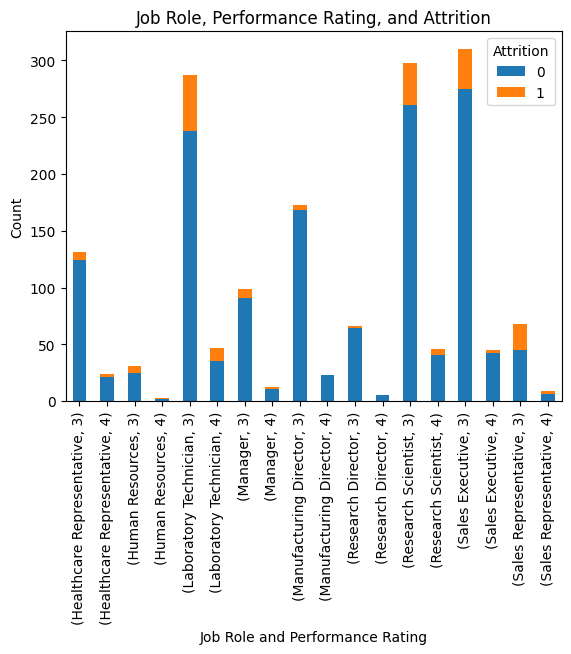

In [27]:
# count the number of occurrences of each combination of JobRole, PerformanceRating, and Attrition
counts = data.groupby(['JobRole', 'PerformanceRating', 'Attrition']).size().unstack(fill_value=0)

# create a stacked bar chart of the counts
ax = counts.plot(kind='bar', stacked=True)

# add labels and title
ax.set_xlabel('Job Role and Performance Rating')
ax.set_ylabel('Count')
ax.set_title('Job Role, Performance Rating, and Attrition')

# add legend
ax.legend(title='Attrition')

# display the plot
plt.show()


**`Insight-16`**
<ul>
<li>16.1: Reserach Scientist, Labratory Technician and Sales Executives are having higher Performance rating as well as they are having higher attrition rate. </li>

</ul>

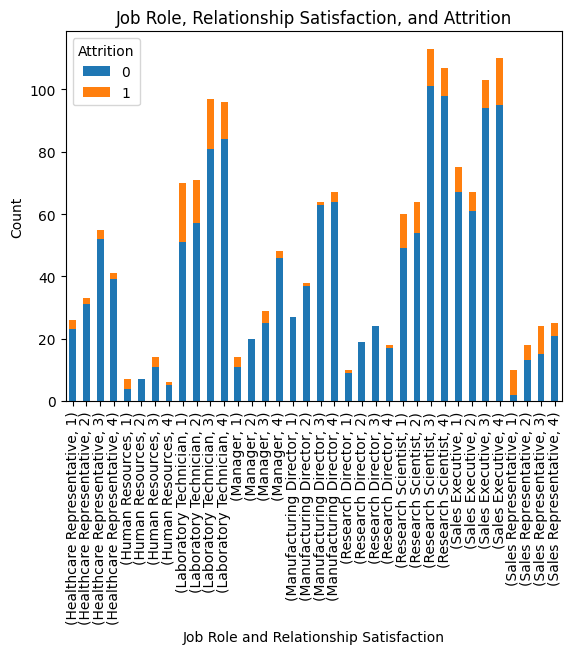

In [28]:
# count the number of occurrences of each combination of JobRole, RelationshipSatisfaction, and Attrition
counts = data.groupby(['JobRole', 'RelationshipSatisfaction', 'Attrition']).size().unstack(fill_value=0)

# create a stacked bar chart of the counts
ax = counts.plot(kind='bar', stacked=True)

# add labels and title
ax.set_xlabel('Job Role and Relationship Satisfaction')
ax.set_ylabel('Count')
ax.set_title('Job Role, Relationship Satisfaction, and Attrition')

# add legend
ax.legend(title='Attrition')

# display the plot
plt.show()

**`Insight-17`**
<ul>
<li>17.1: It's interesting to point that most the the employees who are having lower level of Relationship Satisfiction are more vulnerable to Attrition and its a very obvious point to be noted. </li>

</ul>

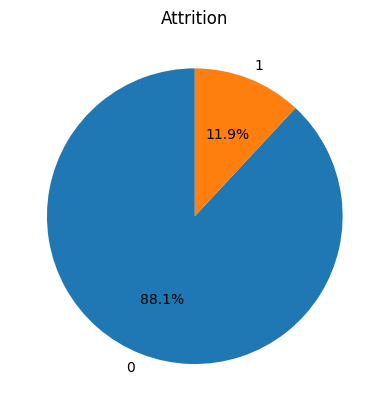

In [29]:
#Now lets check the attrition rate of this company
counts=data["Attrition"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

# add title
plt.title('Attrition')

# display the plot
plt.show()

So, Based on the dataset the percentage of attrition is around 12%. So the dataset is Imbalanced.

> We can also check whether is there any dublicate entries present in thedataset. If so, then we need to remove those duplicates.



In [30]:
# check for duplicates
duplicates = data.duplicated()
print('Number of duplicates:', duplicates.sum())

Number of duplicates: 0


WOW great!!! there is no duplicates. So no need to worry about this. So now we have move forward to the data preprocessing step.

#**Data Preprocessing**

---
First of all we have to handle the categorical data. We have to change this to numerical data like factor or dummies to to use this on further analysis.

#Label Encoding for the features having only two categories

In [31]:
#Initially Changing the variable having two categories to binary values 
#here we will use label encoder to do this
data_new=data.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data_new['OverTime']=label_encoder.fit_transform(data_new['OverTime'])
data_new['Gender']=label_encoder.fit_transform(data_new['Gender'])

#One hot Encoding for the features having only two categories


> When we use dummy variable we need to be cautious about the dummy variable traps. To avoid dummy variable trap one dummy variable is dropped for each of the feature.




In [32]:
data_new=pd.get_dummies(data_new, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'],drop_first=True)
                               #drop_first=True to drop the first dummy variable 
                               

#Checking Correlation between variables

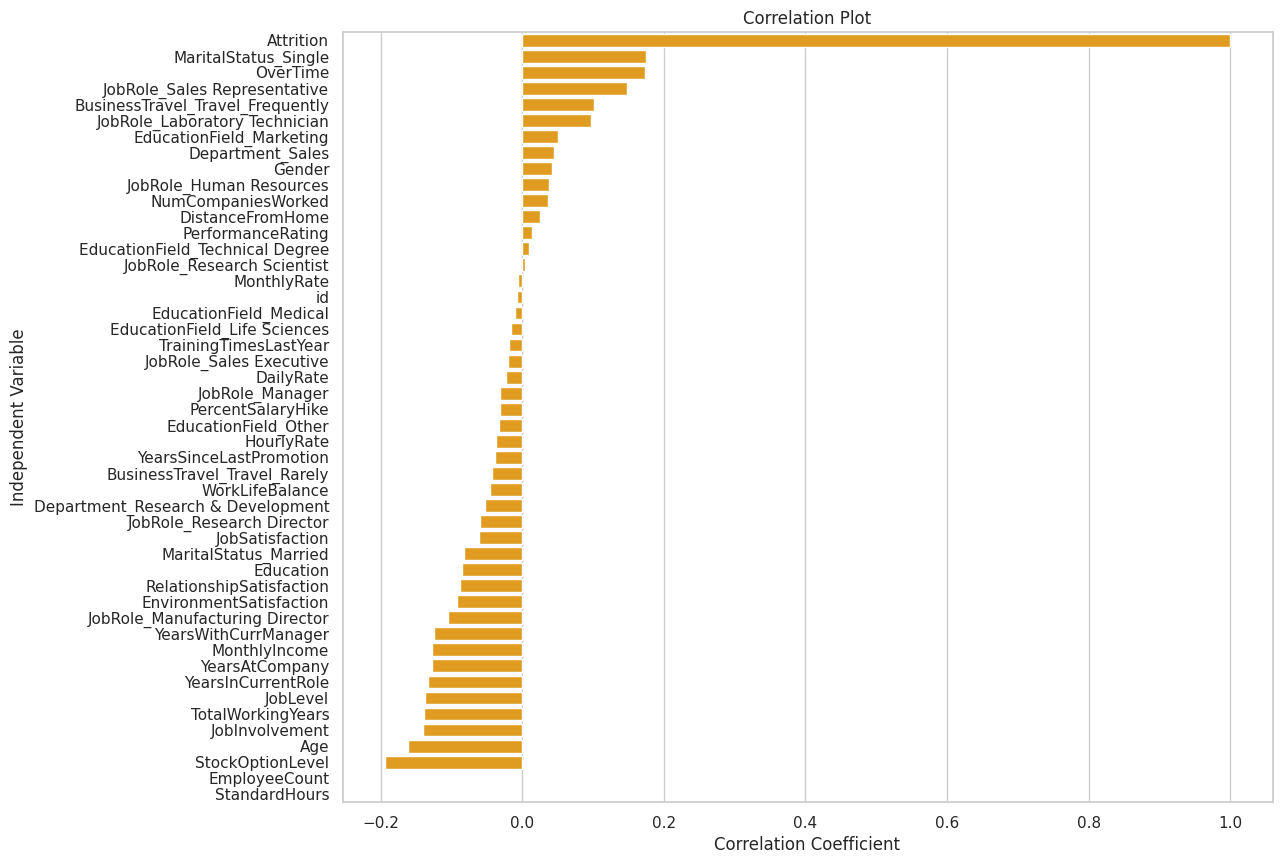

In [33]:
# create a correlation matrix
corr = data_new.corr()

# extract the correlation coefficients for the dependent variable
corr_dep = corr['Attrition']

# sort the correlation coefficients in descending order
corr_dep_sorted = corr_dep.sort_values(ascending=False)

# create a bar plot
sns.set(style='whitegrid')
plt.figure(figsize=(12, 10))
sns.barplot(x=corr_dep_sorted.values, y=corr_dep_sorted.index, color='orange')

# add title and axis labels
plt.title('Correlation Plot')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Independent Variable')

plt.show()

From this correlation plot it's clearly visible that there are lot of unnecessary variables are present.

So we have to remove few of the un-necessary variables.

In [34]:
data_new.drop(["id"],axis=1,inplace=True)
data_new.drop(["Over18"],axis=1,inplace=True) #Over18 Feature has only one category that is yes. Because all employees are over 18.
data_new.drop(["EmployeeCount","StandardHours" ],axis=1,inplace=True) #This features have no correlation with the Attrition

In [35]:
data_new.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobR

#Checking Correlation Between the Independent Variables


> It is necessary to check is there high correlation present in the independent variables. If there are redundent variable present then it might result into multicolinearity issue. To resolve this issue we need to remove the redundant variables and consider only one to diminish the curse of dimentionality. 





In [36]:
# create a correlation matrix
corr = data_new.corr()

# set the threshold
threshold = 0.7 #in general correlation value higher than 0.7 is treated as high correlation

# select the variables with correlation coefficient greater than or equal to the positive threshold
high_corr_vars_pos = corr[corr >= threshold].stack().index.tolist()

# select the variables with correlation coefficient less than or equal to the negative threshold
high_corr_vars_neg = corr[corr <= -threshold].stack().index.tolist()

# combine the lists of variables with high correlation
high_corr_vars = high_corr_vars_pos + high_corr_vars_neg

# remove duplicate pairs of variables
high_corr_vars = list(set(high_corr_vars))

# print the variables with high correlation
for var1, var2 in high_corr_vars:
    if var1 != var2:
        print(f"{var1} and {var2} have a correlation coefficient of: {corr.loc[var1, var2]:.2f}")

JobRole_Sales Executive and Department_Sales have a correlation coefficient of: 0.83
YearsAtCompany and YearsInCurrentRole have a correlation coefficient of: 0.78
JobLevel and TotalWorkingYears have a correlation coefficient of: 0.76
MonthlyIncome and JobLevel have a correlation coefficient of: 0.91
YearsWithCurrManager and YearsInCurrentRole have a correlation coefficient of: 0.75
YearsInCurrentRole and YearsWithCurrManager have a correlation coefficient of: 0.75
TotalWorkingYears and JobLevel have a correlation coefficient of: 0.76
JobLevel and MonthlyIncome have a correlation coefficient of: 0.91
BusinessTravel_Travel_Frequently and BusinessTravel_Travel_Rarely have a correlation coefficient of: -0.78
Department_Research & Development and JobRole_Sales Executive have a correlation coefficient of: -0.78
PercentSalaryHike and PerformanceRating have a correlation coefficient of: 0.75
YearsAtCompany and YearsWithCurrManager have a correlation coefficient of: 0.79
JobRole_Sales Executive



> So, We will consider only one variable instead of considering two variales which are having strong correlation. So, we will drop one of these variables from each of these pairs.





In [37]:
data_new.drop(['TotalWorkingYears', 'JobLevel', 'PercentSalaryHike', 'YearsInCurrentRole',
         'YearsWithCurrManager', 'Department_Research & Development', 'Department_Sales','BusinessTravel_Travel_Rarely',],axis=1,inplace=True)

In [38]:
data_new.columns


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'Attrition',
       'BusinessTravel_Travel_Frequently', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

#Model Building
After data preprocessing it's time to build some predictive model.

#Random Forest

In [39]:
#Splitting the train Test Set and Balacing the dataset 
#Creating a Balance DataSet using SMOTE method
from imblearn.over_sampling import SMOTE
from collections import Counter
X = data_new.iloc[:, [0 ,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33 ,34, 35, 36]].values
y = data_new.iloc[:, 20].values
# print the class distribution
print('Original dataset shape %s' % Counter(y))

# apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# print the class distribution after SMOTE
print('Resampled dataset shape %s' % Counter(y_res))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25, random_state = 0)

Original dataset shape Counter({0: 1477, 1: 200})
Resampled dataset shape Counter({0: 1477, 1: 1477})


> SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to balance imbalanced datasets in machine learning. It is an oversampling technique that generates synthetic samples for the minority class by interpolating between existing samples.
> 
> The basic idea behind SMOTE is to create new synthetic instances of the minority class by selecting pairs of instances that are close in the feature space and then creating new instances along the line connecting them. This helps to add more diversity to the minority class and reduces the risk of overfitting.

In [40]:
#Building the model 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [41]:
#Checking the accuracy 
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[359  25]
 [ 28 327]]


0.9282814614343707

In [42]:
#Checking Accuray With K-fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}".format(accuracies.std()))

Accuracy: 91.74 %
Standard Deviation: 0.03


#XG BOOST

#Building the model

In [43]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#Checking the Accuray

In [44]:
#Checking the accuracy 
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[358  26]
 [ 24 331]]


0.93234100135318

In [45]:
#Checking Accuray With K-fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}".format(accuracies.std()))

Accuracy: 93.59 %
Standard Deviation: 0.03


#Model Comparison:


> It's pretty obvious that in this case XBboost is performing better than random forest. Eventhough both are ensemble methods but XGBoost builds the trees sequentially, with each tree learning from the errors of the previous trees like a feedback. So this improves the performance of the weak learner's. So we will choose XGBoost as our final model. 

And this is the end of this project....

********Thank you**********************

